In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import constants
import Func_read_data
import Func_despike_data
import sensor_info
importlib.reload(Func_read_data)
importlib.reload(Func_despike_data)
importlib.reload(constants)
importlib.reload(sensor_info)

from Func_read_data import read_data
from constants import *
from Func_despike_data import *

from sensor_info import *

In [224]:
plim, calibration_coefficients, heights= get_sensor_info(sensor)
heights['WIND1']
calibration_coefficients
plim

,abs.u,abs.v,abs.w,Ts.low,Ts.up,h2o.low,h2o.up
0,40,40,10,-40,12,0,680


Plausibility limits applied
Applying H2O calibration
Mean H2O concentration difference: 113.90519551762638
Shape of df_vapp:  47
nans in fastdata:  0
Shape of df_p:  841170
H2O calibration applied
Processing large dataset (%)
Spikes removed from Ux,Uy,Uz,Ts:3378 Spikes removed from LI_H2Om_corr:16546


/home/engbers/miniconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


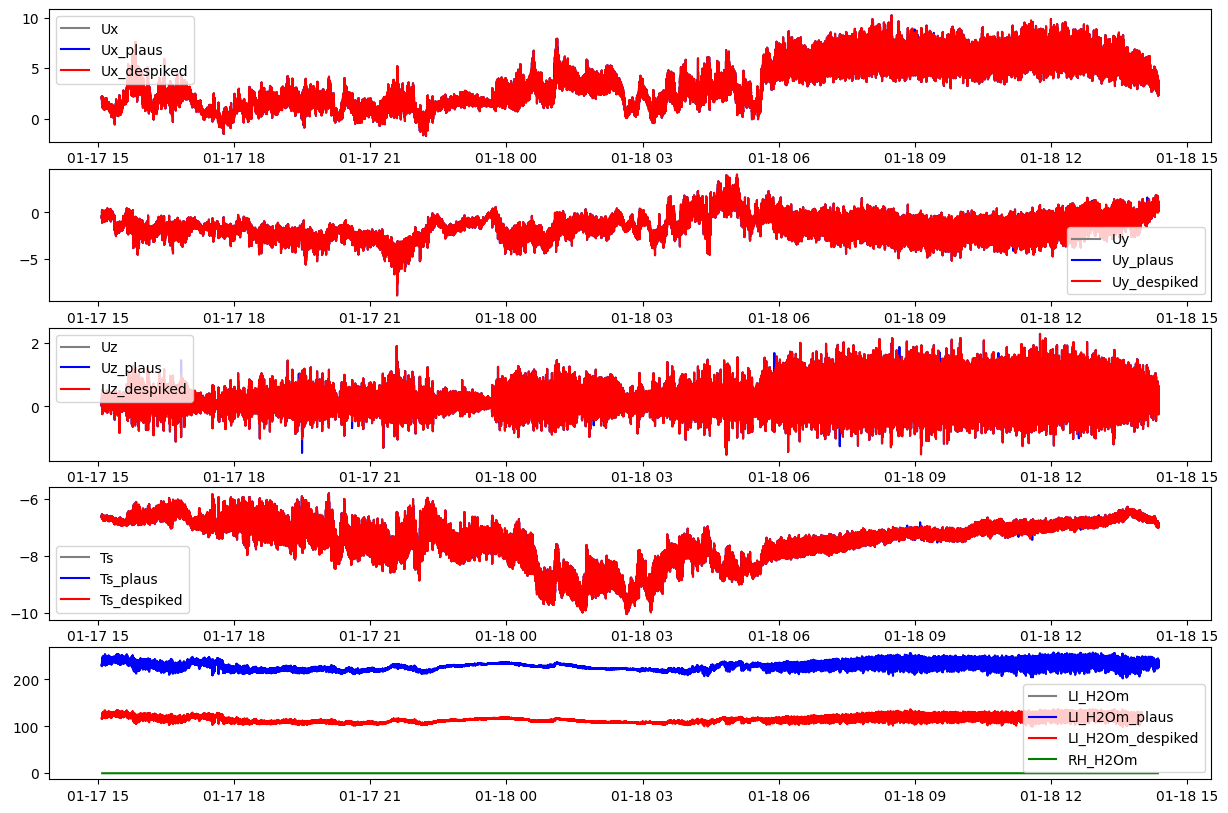

In [233]:
sensor='SFC'
"""GET SENSOR INFO"""
plim, calibration_coefficients, heights= get_sensor_info(sensor)
"""READ FAST AND SLOW DATA from folder"""
fast_folder='/home/engbers/Documents/PhD/Data/EC/'
fastdata=read_data(fast_folder, 'fast', 'long')

slow_folder='/home/engbers/Documents/PhD/Data/EC/'
slowdata=read_data(slow_folder, 'slow', 'short')

"""DESPIKE, PLOT, AND SAVE"""
df=despike_fast_MAD(fastdata, slowdata, plim, calibration_coefficients, plot_despike=True)

In [234]:
"""READ FAST AND SLOW DATA from folder"""
fast_folder='/home/engbers/Documents/PhD/Data/EC/'
fastdata=read_data(fast_folder, 'fast', 'long')

slow_folder='/home/engbers/Documents/PhD/Data/EC/'
slowdata=read_data(slow_folder, 'slow', 'short')

slowdata.attrs['units']

{'TIMESTAMP': 'TS',
 'RECORD': 'RN',
 'rmcutcdate': nan,
 'rmcutctime': nan,
 'rmclatitude': nan,
 'rmclongitude': nan,
 'BattV_Min': 'Volts',
 'PTemp_Avg': 'degC',
 'PowerSPC': nan,
 'PowerLIC': nan,
 'PowerHtr': nan,
 'WD1': 'deg',
 'WD2': 'deg',
 'TA': 'degC',
 'RH': '%',
 'HS_Cor': 'm',
 'HS_Qty': nan,
 'SBTempK': nan,
 'SFTempK': nan,
 'SWdown1': 'W/m2',
 'SWup1': 'W/m2',
 'LWdown1': 'W/m2',
 'LWup1': 'W/m2',
 'SWdown2': 'W/m2',
 'SWup2': 'W/m2',
 'LWdown2': 'W/m2',
 'LWup2': 'W/m2',
 'SWdn': 'W/m2',
 'SensorT': 'degC',
 'PF_FC4': 'g/m2/s',
 'WS_FC4': 'km/h'}

In [13]:
despiked_fastdata=despiking(fastdata2)

Despiking...
nrspikes[0] = 65
nrspikesirg[0] = 0
nrspikestot[0] = 65
nrspikes[1] = 67
nrspikesirg[1] = 0
nrspikestot[1] = 67


In [7]:
fastdata2=fastdata.copy()

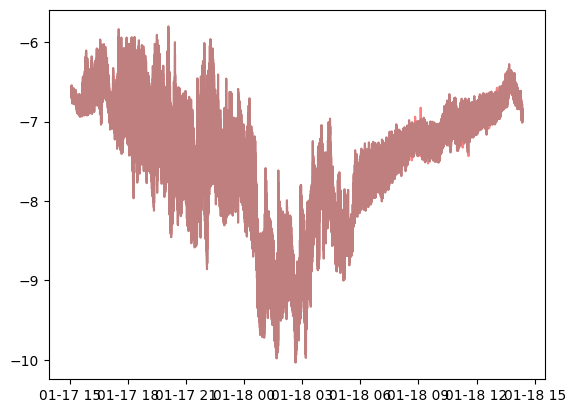

In [22]:
plt.figure() 
plt.plot(fastdata2['T'], alpha=0.5, color='red')
plt.plot(despiked_fastdata['T'], alpha=0.5, color='grey')

In [82]:
despiked_fastdata['T'].isna().sum() 

np.int64(67)